In [2]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_paths = glob('../dataset/mnist_png/training/0/*.png')

path = data_paths[0]
path

'../dataset/mnist_png/training/0\\1.png'

In [12]:
data_paths = tf.io.matching_files('../dataset/mnist_png/training/*/*.png')

path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'..\\dataset\\mnist_png\\training\\0\\1.png'>

### Load Image

In [15]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

image.shape

TensorShape([28, 28, 1])

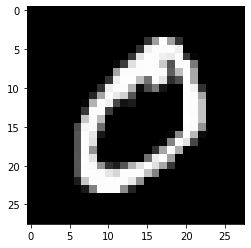

In [17]:
plt.imshow(image, 'gray')
plt.show()

### Set Data Generator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
) 

In [24]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

(1, 28, 28, 1)


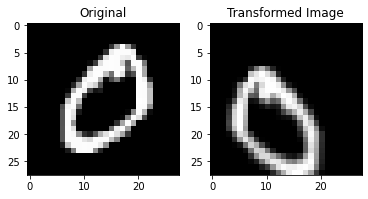

In [39]:
image = next(iter(datagen.flow(inputs)))

print(image.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(image), 'gray')
plt.show()

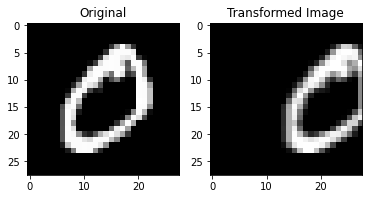

In [41]:
datagen = ImageDataGenerator(
    width_shift_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

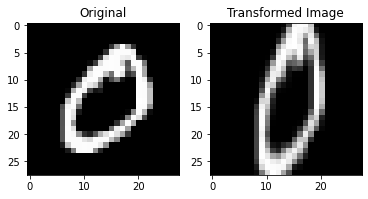

In [51]:
datagen = ImageDataGenerator(
    zoom_range=0.5
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

### Transformation

> - width_shift_range
> - height_shift_range
> - brightness_range
> - zoom_range
> - horizontal_flip
> - vertical_flip
> - rescale
> - preprocessing_function

### Rescale시 주의사항

> - Augmentation : train에만 적용
> - Rescale / Normalization : train, test 적용

In [53]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)